In [2]:
# simulation.ipynb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy import stats
import warnings
import sys
sys.path.append('../src')

# Suppress specific FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning, 
                       message='use_inf_as_na option is deprecated')

# Import the required classes and modules
from environment_gym import TrafficEnvironment
from agent import RuleBasedAgent, RandomAgent
from agent import RandomAgent

In [3]:
def run_episode(env, agent):
    """
    Run a single episode in the environment.
    
    Args:
    - env: The gymnasium environment
    - agent: Agent instance
    
    Returns:
    - total_reward: Total reward accumulated in the episode
    - steps: Number of steps taken in the episode
    """
    state, _ = env.reset(seed=2024)
    terminated = False
    truncated = False
    total_reward = 0
    steps = 0
    
    while not (terminated or truncated):
        action = agent.choose_action(state)
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        steps += 1
        state = next_state
    
    return total_reward, steps

def run_agent_simulations(agent_instance, num_episodes=1000):
    """
    Run multiple episodes with the given agent instance.
    
    Args:
    - agent_instance: Instantiated agent object
    - num_episodes: Number of episodes to run
    
    Returns:
    - dict containing simulation results
    """
    env = TrafficEnvironment()
    rewards = []
    steps_list = []
    
    # Run episodes with progress bar
    for _ in tqdm(range(num_episodes), desc=f"Running {agent_instance.__class__.__name__}"):
        try:
            episode_reward, episode_steps = run_episode(env, agent_instance)
            rewards.append(episode_reward)
            steps_list.append(episode_steps)
        except Exception as e:
            print(f"Error in episode: {e}")
            continue
    
    return {
        'rewards': rewards,
        'steps': steps_list,
        'agent_name': agent_instance.__class__.__name__
    }

def analyze_results(results):
    """
    Analyze and print statistics from simulation results.
    """
    rewards = results['rewards']
    steps = results['steps']
    agent_name = results['agent_name']
    
    print(f"\nResults for {agent_name}")
    print("-" * 50)
    print(f"Rewards:")
    print(f"  Mean: {np.mean(rewards):.2f}")
    print(f"  Std Dev: {np.std(rewards):.2f}")
    print(f"  Min: {np.min(rewards):.2f}")
    print(f"  Max: {np.max(rewards):.2f}")
    print(f"  Median: {np.median(rewards):.2f}")
    
    print(f"\nSteps:")
    print(f"  Mean: {np.mean(steps):.2f}")
    print(f"  Std Dev: {np.std(steps):.2f}")
    print(f"  Min: {np.min(steps):.2f}")
    print(f"  Max: {np.max(steps):.2f}")
    print(f"  Median: {np.median(steps):.2f}")

def plot_agent_results(results):
    """
    Create visualizations of simulation results.
    """
    rewards = results['rewards']
    steps = results['steps']
    agent_name = results['agent_name']
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Reward histogram with KDE
    sns.histplot(data=rewards, bins=30, kde=True, ax=ax1)
    ax1.set_title(f'{agent_name}: Distribution of Rewards')
    ax1.set_xlabel('Reward')
    ax1.set_ylabel('Frequency')
    
    # Steps histogram with KDE
    sns.histplot(data=steps, bins=30, kde=True, ax=ax2)
    ax2.set_title(f'{agent_name}: Distribution of Steps')
    ax2.set_xlabel('Steps')
    ax2.set_ylabel('Frequency')
    
    # Reward over episodes
    sns.lineplot(data=rewards, ax=ax3)
    ax3.set_title(f'{agent_name}: Rewards over Episodes')
    ax3.set_xlabel('Episode')
    ax3.set_ylabel('Reward')
    
    # Steps over episodes
    sns.lineplot(data=steps, ax=ax4)
    ax4.set_title(f'{agent_name}: Steps over Episodes')
    ax4.set_xlabel('Episode')
    ax4.set_ylabel('Steps')
    
    plt.tight_layout()
    return fig

def compare_agents(agent_classes, agent_params=None, num_episodes=1000):
    """
    Run simulations and compare multiple agents.
    
    Args:
    - agent_classes: List of agent classes to compare
    - agent_params: Dictionary of parameters for each agent (optional)
    - num_episodes: Number of episodes per agent
    """
    if agent_params is None:
        agent_params = {cls.__name__: {} for cls in agent_classes}
    
    all_results = []
    
    # Run simulations for each agent
    for agent_class in agent_classes:
        # Instantiate agent with parameters if provided
        params = agent_params.get(agent_class.__name__, {})
        agent_instance = agent_class(**params)
        
        # Run simulations
        results = run_agent_simulations(agent_instance, num_episodes)
        all_results.append(results)
        
        # Analyze and plot individual results
        analyze_results(results)
        plot_agent_results(results)
        plt.show()
    
    # Create comparison plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Box plots for rewards
    reward_data = [result['rewards'] for result in all_results]
    ax1.boxplot(reward_data, labels=[result['agent_name'] for result in all_results])
    ax1.set_title('Reward Distribution Comparison')
    ax1.set_ylabel('Reward')
    
    # Box plots for steps
    step_data = [result['steps'] for result in all_results]
    ax2.boxplot(step_data, labels=[result['agent_name'] for result in all_results])
    ax2.set_title('Steps Distribution Comparison')
    ax2.set_ylabel('Steps')
    
    plt.tight_layout()
    plt.show()
    
    # Statistical comparison
    print("\nStatistical Comparison:")
    print("-" * 50)
    for i, result1 in enumerate(all_results):
        for j, result2 in enumerate(all_results):
            if i < j:
                rewards1 = result1['rewards']
                rewards2 = result2['rewards']
                tstat, pval = stats.ttest_ind(rewards1, rewards2)
                print(f"\n{result1['agent_name']} vs {result2['agent_name']}:")
                print(f"t-statistic: {tstat:.4f}")
                print(f"p-value: {pval:.4f}")


Running RuleBasedAgent: 100%|██████████| 1000/1000 [00:24<00:00, 40.44it/s]



Results for RuleBasedAgent
--------------------------------------------------
Rewards:
  Mean: -3688.62
  Std Dev: 10659.76
  Min: -60585.00
  Max: 3500.00
  Median: 1317.50

Steps:
  Mean: 646.21
  Std Dev: 840.64
  Min: 48.00
  Max: 4989.00
  Median: 249.50


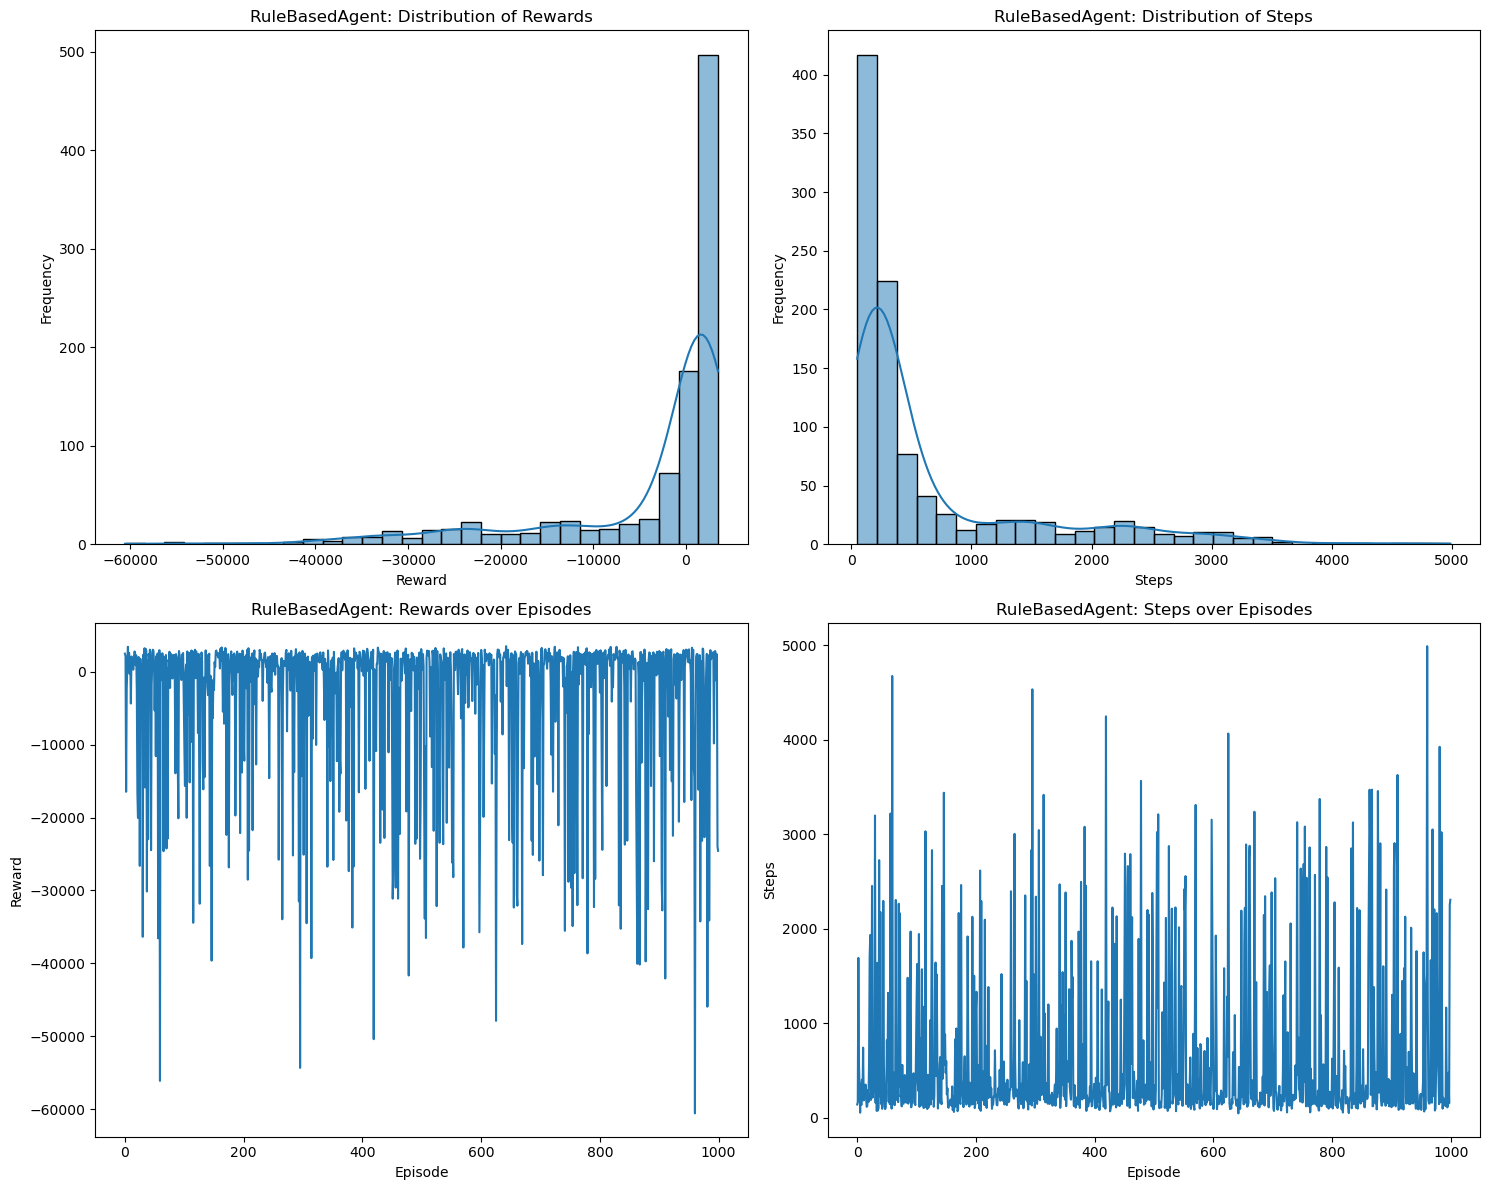

Running RandomAgent: 100%|██████████| 1000/1000 [00:31<00:00, 32.16it/s]



Results for RandomAgent
--------------------------------------------------
Rewards:
  Mean: -11190.17
  Std Dev: 15403.36
  Min: -65135.00
  Max: 2680.00
  Median: -2952.50

Steps:
  Mean: 1012.68
  Std Dev: 1026.89
  Min: 88.00
  Max: 4609.00
  Median: 463.50


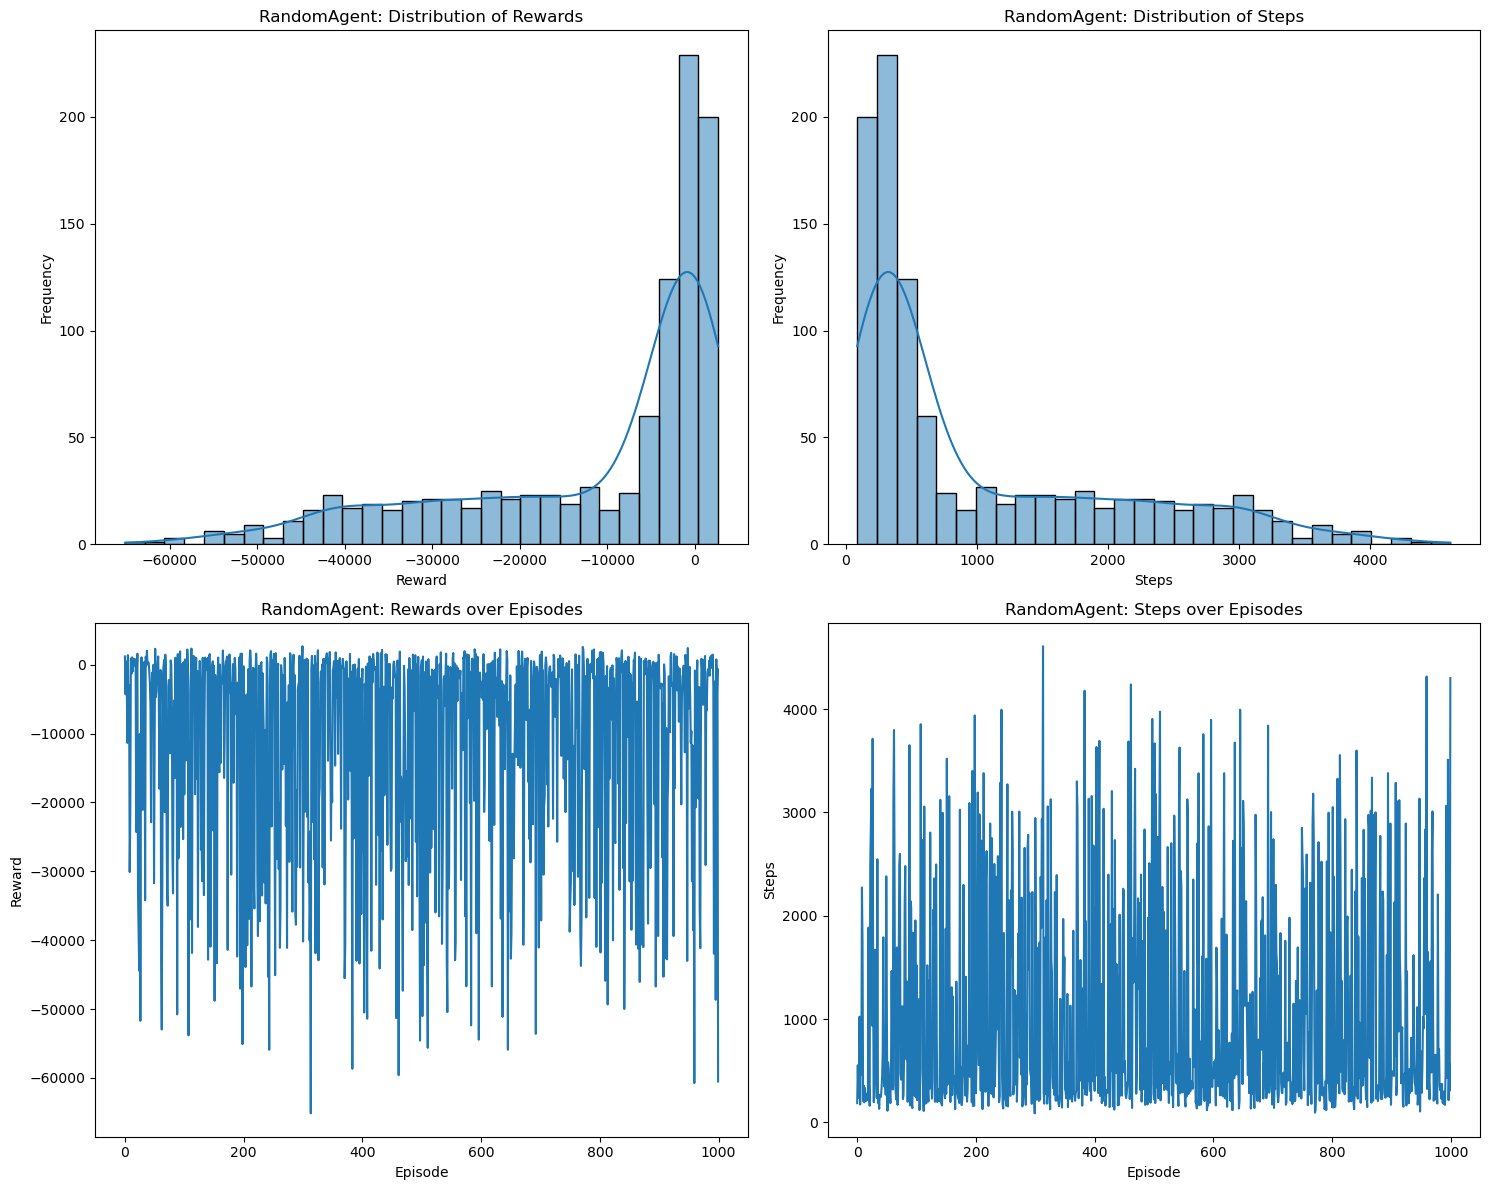

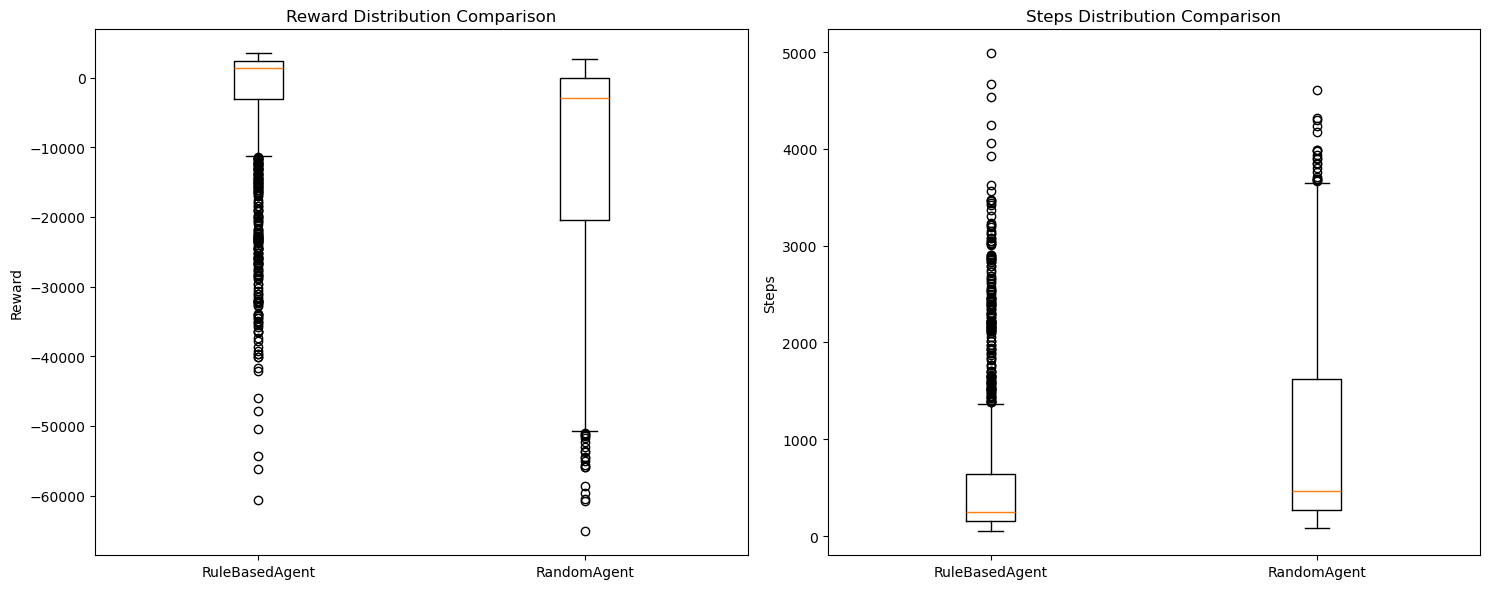


Statistical Comparison:
--------------------------------------------------

RuleBasedAgent vs RandomAgent:
t-statistic: 12.6574
p-value: 0.0000


In [4]:
# Define agent parameters
agent_params = {
    'RandomAgent': {'change_lane_percentage': 100},
    'RuleBasedAgent': {}
}

# Create agent instances
agents = [RuleBasedAgent, RandomAgent]

# Run comparison
compare_agents(agents, agent_params, num_episodes=1000)